<a href="https://colab.research.google.com/github/Jlok17/Data620/blob/main/Assignment_HighFrequency_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment – High Frequency Words:
The assignment requires the following parameters.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('gutenberg')
import re


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


#### 1. Choosing a Corpus:
 I decided to pick Moby Dick by Herman Melville, the 1851 classic from the NLTK Gutenberg Archive, as my text for analyzation.


In [65]:
nltk.corpus.gutenberg.fileids()
MD = nltk.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
repr(MD)

'<Text: Moby Dick by Herman Melville 1851>'

#### 2. How many total unique words are in the corpus?
There are 19317 Unique Words if you are including non-word characters but only 16948 if you filter them out.


In [66]:
unique_MD = set(MD)
print(len(unique_MD))
print(sorted(unique_MD)[:50])

clean_MD = [word.lower() for word in unique_MD if re.match(r'^[a-zA-Z]+$', word)]
print(len(set(clean_MD)))

19317
['!', '!"', '!"--', "!'", '!\'"', '!)', '!)"', '!*', '!--', '!--"', "!--'", '"', '"\'', '"--', '"...', '";', '$', '&', "'", "',", "',--", "'-", "'--", "';", '(', ')', '),', ')--', ').', ').--', '):', ');', ');--', '*', ',', ',"', ',"--', ",'", ",'--", ',)', ',*', ',--', ',--"', ",--'", '-', '--', '--"', "--'", '--\'"', '--(']
16948


#### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?
91 words.

In [67]:
# create list of all words including duplicates, but excluding punctuation, numbers and capitalization
MD_1 = [word.lower() for word in MD if re.match(r'^[a-zA-Z]+$', word)]
print(*MD_1[:100], sep = "   ")
len(set(MD_1))
fdist = nltk.FreqDist(MD_1)
fdist

moby   dick   by   herman   melville   etymology   supplied   by   a   late   consumptive   usher   to   a   grammar   school   the   pale   usher   threadbare   in   coat   heart   body   and   brain   i   see   him   now   he   was   ever   dusting   his   old   lexicons   and   grammars   with   a   queer   handkerchief   mockingly   embellished   with   all   the   gay   flags   of   all   the   known   nations   of   the   world   he   loved   to   dust   his   old   grammars   it   somehow   mildly   reminded   him   of   his   mortality   while   you   take   in   hand   to   school   others   and   to   teach   them   by   what   name   a   whale   fish   is   to   be   called   in   our   tongue   leaving   out


FreqDist({'the': 14431, 'of': 6609, 'and': 6430, 'a': 4736, 'to': 4625, 'in': 4172, 'that': 3085, 'his': 2530, 'it': 2522, 'i': 2127, ...})

In [68]:
tw = len(MD_1)
tcount = 0
wcount = 0
print("Total words is: {}".format(tw))
for word, count in fdist.most_common():
    tcount += count
    wcount += 1
    if tcount > (tw / 2):
        print("{} words represent half of the total.".format(wcount))
        break

Total words is: 218361
91 words represent half of the total.


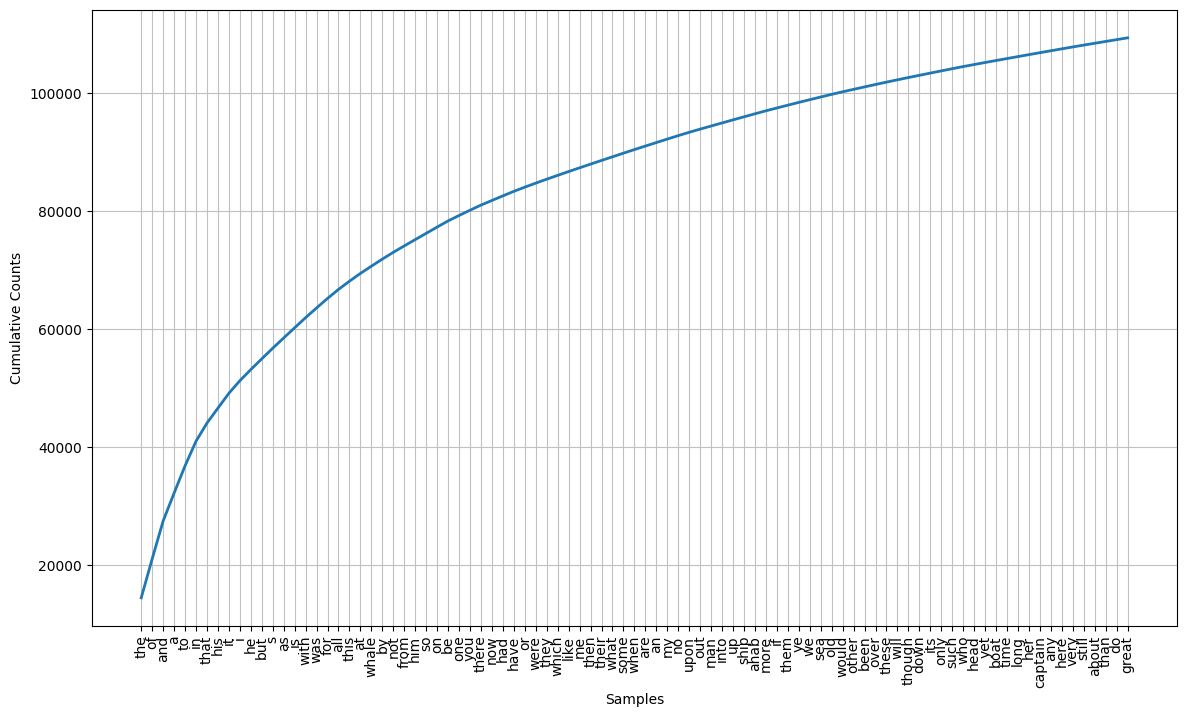

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [69]:
plt.figure(figsize=(14,8))
fdist.plot(91, cumulative = True)

#### 4. Identify the 200 highest frequency words in this corpus.


In [70]:
wlist = [pd.DataFrame(fdist.most_common()[i:(i+25)], columns=['word', 'count']) for i in range(0, 200, 25)]
result = pd.concat(wlist, axis=1)

print(result)

     word  count   word  count    word  count     word  count      word  \
0     the  14431    him   1067    upon    566      who    363     white   
1      of   6609     so   1065     out    538     head    345      last   
2     and   6430     on   1062     man    527      yet    345       see   
3       a   4736     be   1045    into    523     boat    336      thou   
4      to   4625    one    921      up    521     time    334       way   
5      in   4172    you    894    ship    518     long    333     after   
6    that   3085  there    869    ahab    511      her    332    whales   
7     his   2530    now    785    more    508  captain    329     again   
8      it   2522    had    779      if    481      any    327       did   
9       i   2127   have    768    them    474     here    325     stubb   
10     he   1896     or    713      ye    472     very    322       how   
11    but   1818   were    684      we    460    still    312  queequeg   
12      s   1802   they  

#### 5. Create a graph that shows the relative frequency of these 200 words.

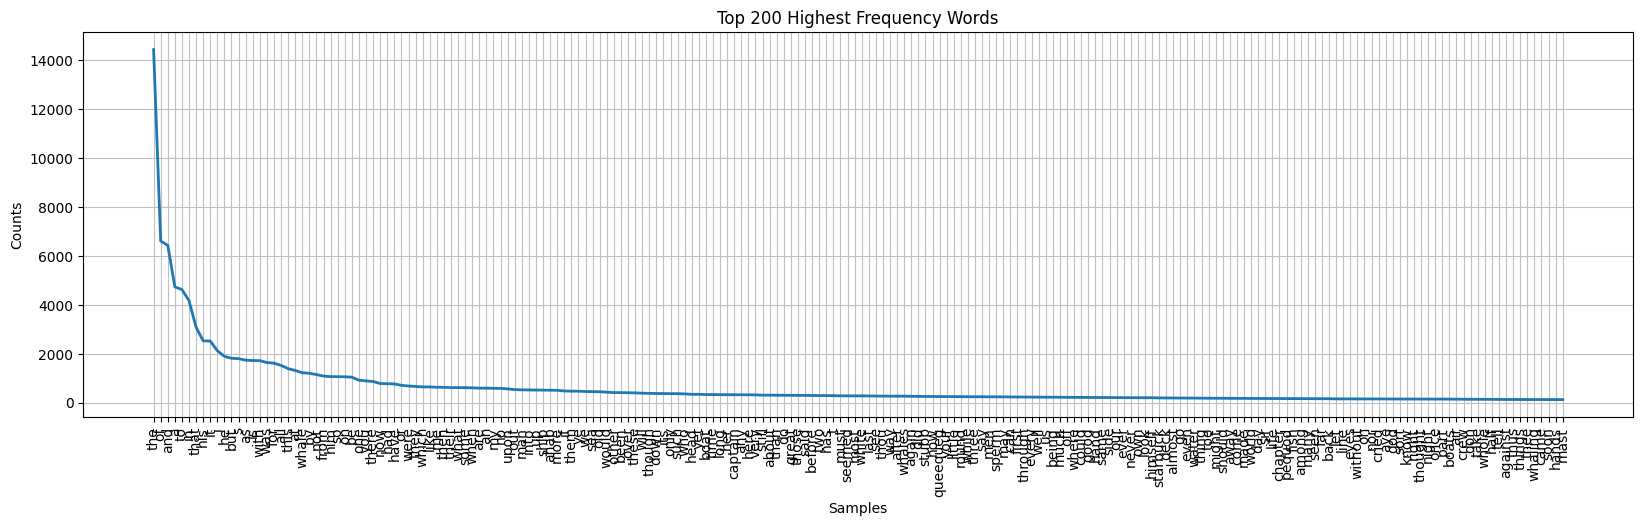

In [71]:
plt.figure(figsize=(20, 5))
plt.title('Top 200 Highest Frequency Words')
fdist.plot(200, cumulative=False)
plt.show()


#### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.


> Zipf's Law: a statistical distribution in certain data sets, such as words in a linguistic corpus, in which the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

As seen from the top 30 there are massive differences between the actual word count and the Zipf's Law expected count. However if you see the example below where I took the values of index row's 25,50,100,200. You can see that the actual counts seem to be decreased in half as you increase it by row index but it doesn't follow from the predicted Zipf's count from the entire dataframe.

In [72]:
mostf = fdist.most_common()[0][1]
expected_counts = [round(mostf * (1 / (rank + 1))) for rank, (_, count) in enumerate(fdist.items())]

zipfs_df = pd.DataFrame(fdist.most_common(), columns=['Word', 'Actual count'])
zipfs_df = zipfs_df.assign(
    Expected_Zipfs_Count=expected_counts,
    Difference=zipfs_df['Actual count'] - expected_counts,
    Percent_Difference=round((zipfs_df['Actual count'] / expected_counts - 1) * 100).astype(int)
)

print(zipfs_df.head(30))


     Word  Actual count  Expected_Zipfs_Count  Difference  Percent_Difference
0     the         14431                 14431           0                   0
1      of          6609                  7216        -607                  -8
2     and          6430                  4810        1620                  34
3       a          4736                  3608        1128                  31
4      to          4625                  2886        1739                  60
5      in          4172                  2405        1767                  73
6    that          3085                  2062        1023                  50
7     his          2530                  1804         726                  40
8      it          2522                  1603         919                  57
9       i          2127                  1443         684                  47
10     he          1896                  1312         584                  45
11    but          1818                  1203         615       

In [73]:
print(zipfs_df.iloc[25])
print("         ")
print(zipfs_df.iloc[50])
print("         ")
print(zipfs_df.iloc[100])
print("         ")
print(zipfs_df.iloc[200])
print("         ")
print(zipfs_df.iloc[400])


Word                     him
Actual count            1067
Expected_Zipfs_Count     555
Difference               512
Percent_Difference        92
Name: 25, dtype: object
         
Word                    upon
Actual count             566
Expected_Zipfs_Count     283
Difference               283
Percent_Difference       100
Name: 50, dtype: object
         
Word                    white
Actual count              281
Expected_Zipfs_Count      143
Difference                138
Percent_Difference         97
Name: 100, dtype: object
         
Word                    small
Actual count              128
Expected_Zipfs_Count       72
Difference                 56
Percent_Difference         78
Name: 200, dtype: object
         
Word                    call
Actual count              55
Expected_Zipfs_Count      36
Difference                19
Percent_Difference        53
Name: 400, dtype: object


#### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


There are several reasons why the word frequency of this corpus is different from the "all words in all corpora". First "All words in all Corpora" means the generalization of most frequent words that is used in all different type of corpora or any text. So since that is a generalization the comparison is that there is different types of differences when analyzing texts such as domain specific vocabulary, text genre and style, language variation, and corpus size. For Moby Dick, it is a literature so it will fall under the semi-heavy use of commonly used words in categories such as names, boats, hunting, and the ocean. Comparing this to something unrelated there would be very little similarity in the most frequency of words in those topic spaces. However, that being said in the english language there are a lot of commonly used words just in every general text and those would still be highly prevalent in this literature. Some examples of this would be shown below as seen by the dataframe there seems to be 65 matches of words from top 100 most frequently used words in Moby Dick and English.

In [74]:
print(zipfs_df["Word"].head(50))


0       the
1        of
2       and
3         a
4        to
5        in
6      that
7       his
8        it
9         i
10       he
11      but
12        s
13       as
14       is
15     with
16      was
17      for
18      all
19     this
20       at
21    whale
22       by
23      not
24     from
25      him
26       so
27       on
28       be
29      one
30      you
31    there
32      now
33      had
34     have
35       or
36     were
37     they
38    which
39     like
40       me
41     then
42    their
43     what
44     some
45     when
46      are
47       an
48       my
49       no
Name: Word, dtype: object


In [75]:
Top_English = pd.read_html('https://en.wikipedia.org/wiki/Most_common_words_in_English#100_most_common_words', header=0, index_col=None)
Top_English = Top_English[0]
Top_English['Word'] = Top_English['Word'].str.lower()


MD_100 = pd.DataFrame({'MD_Word': [word for word, _ in fdist.most_common(100)],
                       'MD_Frequency': [count for _, count in fdist.most_common(100)],
                       'MD_Rank': range(1, 101)})

matched_words = pd.merge(MD_100, Top_English, left_on='MD_Word', right_on='Word', how='inner')
matched_words = matched_words[['MD_Word', 'MD_Rank', 'Word', 'OEC rank']].dropna().astype({'MD_Rank': int})
matched_words

,MD_Word,MD_Rank,Word,OEC rank
0,the,1,the,1
1,of,2,of,4
2,and,3,and,5
3,a,4,a,6
4,to,5,to,3
...,...,...,...,...
60,about,88,about,45
61,than,89,than,71
62,do,90,do,19
63,two,95,two,84
